gnn_model l1 :  0.9134316444396973
gnn_model l2 :  0.34906697273254395
gnn_model l3 :  0.33211183547973633
gnn_model :  1.5956072807312012
multinomial :  0.0019941329956054688
knn simple :  0.000997304916381836
simp^le devconv :  0.04441690444946289
sparse attention edge predictor :  0.0
face candidate :  0.0
triangle indexes :  0.007977724075317383
traingle node :  0.0
first p init :  0.0
barycenter :  0.0
knn :  0.1625664234161377
r matrix :  0.001993894577026367
mlp :  0.021942138671875
selected triangles topk :  0.0


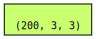

In [1]:
import torch
import time

from torchviz import make_dot
from mesh_dataset import MeshDataset
from torch.utils.data import DataLoader
from gnn_simplification_model import GNNSimplificationMesh
from loss.loss import total_loss
from tqdm import tqdm

torch.manual_seed(42)


number_neigh_tri = 20
# if len(graph._node)<20:
#     raise Exception("Input mesh does not have enough vertices. (More than 20 is needed)")
torch_dataset = MeshDataset("E:/shared/projects/Mesh-simplification-GNN/3d_models/stl/")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gnn_model = GNNSimplificationMesh(number_neigh_tri).to(device)
optimizer = torch.optim.Adam(gnn_model.parameters(), lr=1e-5, weight_decay=0.99)
graph_nodes, graph_adjacency_matrix, triangles = torch_dataset[0]
graph_nodes, graph_adjacency_matrix, triangles = graph_nodes.to(device), graph_adjacency_matrix.to(device), triangles.to(device)
output = gnn_model(200, graph_nodes, graph_adjacency_matrix)
make_dot(output, params=dict(gnn_model.named_parameters()))